# TASK 2 (Linear Regression)

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is simple linear regression task as it involves just two variables.

What will be predicted score if a student study for 9.25 hrs in a day?

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read and Load Data from url

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# shape of data set (No. of rows, No. of column)
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# statistical summary of the data set

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Relation between Hours and Scores

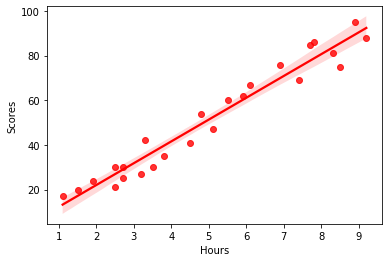

In [6]:
sns.regplot(x= 'Hours', y = 'Scores', data = df, color='r')

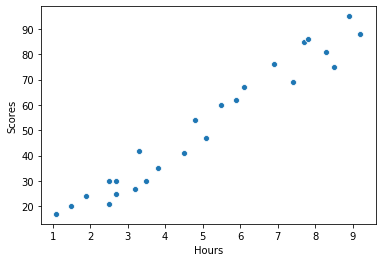

In [7]:
sns.scatterplot(x= 'Hours', y = 'Scores', data = df)

## Split the dataset into train and test split

In [8]:
#X = df[['Hours']]
#y = df['Scores']

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 79)

## Model Building

In [12]:
from sklearn.linear_model import LinearRegression

model  = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.score(X_train, y_train)

0.9433566415120905

In [15]:
preds  = model.predict(X_test)
preds

array([27.15148962, 75.07957418, 49.64834564, 56.49521486, 92.68580932,
       39.86710389, 89.7514368 , 17.37024787])

## Model Evaluation

In [16]:
from sklearn.metrics import r2_score

score = r2_score(y_test, preds)
print("R_squared Error :", score)

R_squared Error : 0.9672966735446663


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, preds)
MSE = mean_squared_error(y_test, preds)

print("Mean Absolute Error : ", MAE)
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error (RMSE) :", np.sqrt(MSE))

Mean Absolute Error :  4.689841480438141
Mean Squared Error :  23.26637281506646
Root Mean Squared Error (RMSE) : 4.823522863537236


## Actual vs Predicted

In [18]:
df1 = pd.DataFrame({ 'Actual' : y_test, 'Predicted' : preds })
df1

,Actual,Predicted
0,21,27.151490
1,69,75.079574
2,54,49.648346
3,60,56.495215
4,88,92.685809
5,35,39.867104
6,95,89.751437
7,20,17.370248


## What will be predicted score if a student study for 9.25 hrs in a day?

In [19]:
predicted_Score = model.predict([[9.25]])

print("If a student study for 9.25 Hrs in a day then predicted score : ", predicted_Score[0])

If a student study for 9.25 Hrs in a day then predicted score :  93.17487141114478
